# Capstone Project_PT

## Brewery Neighborhoods

### The aim of this exercise is to plan a 10-day vacation to do beer tour either on the west coast or east coast of the US. For the west coast, San Francisco, CA was chosen as the centre and Boston, MA for the east coast. Within a radius of 1000km from the center, clusters of breweries based on location are analyzed so that a vacation can be planned. Apart from the number  of breweries in each cluster other interest to explore in the negihborhood is the museums.
### The approach, therfore, is to look at clusters of breweries and museums in the respective neighborhoods from each region (SFO and Boston). The output would be to generate 3 clusters of breweries from each region, and the museums around corresponding centroids. This summary would be helpful to identify what location(s) would be the best for vacation.

##### 1. Import necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd
!pip install geopy

In [4]:
import json 

from geopy.geocoders import Nominatim 

import urllib
import requests 
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

##### 2. Credentials for Foursquare

In [5]:
CLIENT_ID = 'YMX5TBXNFF0OEYWZ1ASKBOZTGOAMBZYB4Y34NZBWB30GZA34' # your Foursquare ID
CLIENT_SECRET = 'EJDSGO1E1OSRZN3Y4ITYZRIP4A1TTC4DNONDGHF4RCFMQ2H4' # your Foursquare Secret
VERSION = '20200603'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YMX5TBXNFF0OEYWZ1ASKBOZTGOAMBZYB4Y34NZBWB30GZA34
CLIENT_SECRET:EJDSGO1E1OSRZN3Y4ITYZRIP4A1TTC4DNONDGHF4RCFMQ2H4


##### 3. Locations of San Francisco, CA (SFO) and Boston, MA(BOS) from FourSquare

In [6]:
addressSFO = ['San Francisco, CA, USA']
addressBOS = ['Boston, MA, USA']

geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(addressSFO)
location2 = geolocator.geocode(addressBOS)
latitude1 = location1.latitude
longitude1 = location1.longitude
latitude2 = location2.latitude
longitude2 = location2.longitude
print('SFO address:', latitude1, longitude1)
print('BOS address:', latitude2, longitude2)

SFO address: 37.7790262 -122.4199061
BOS address: 42.3602534 -71.0582912


##### 3.1. Search radius around the locations is 1000 km 

In [7]:
search_query1 = 'Brewery'
radius1 = 1000000
LIMIT = 1000

In [8]:
urlSFO_b = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query1, radius1, LIMIT)
urlBOS_b = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query1, radius1, LIMIT)


In [9]:
beerSFO = requests.get(urlSFO_b).json()
beerBOS = requests.get(urlBOS_b).json()

##### 4. In the following cells, the data from the json files is sorted and carried to dataframes for both SFO and BOS locations

In [11]:
SFObeerlist = beerSFO['response']['venues']
BOSbeerlist = beerBOS['response']['venues']

##### 4.1. Create dataframe by selecting specific columns to list of first 10 breweries in the SFO location 

In [14]:
SFObeer_df = pd.json_normalize(SFObeerlist)
SFOb_df = SFObeer_df[['id','name','location.lat','location.lng','location.distance']]
SFOb_df.head(10)


,id,name,location.lat,location.lng,location.distance
0,3fd66200f964a52066ed1ee3,Magnolia Gastropub & Brewery,37.770251,-122.445340,2441
1,4ba99069f964a520b22e3ae3,Clara St. Brewery,37.779432,-122.402329,1547
2,42af6f80f964a5205e251fe3,21st Amendment Brewery & Restaurant,37.782346,-122.392588,2431
3,57ad18db498ef869391fa0d8,Jackson Brewery Complex,37.771800,-122.413702,972
4,5865de10076be150f6193141,K-OZ Restaurant & Brewery,37.778557,-122.410020,871
5,5de50f3812fc7700087654b2,HOLYCRAFT BREWERY,37.787539,-122.434924,1625
6,43cc06a3f964a520c72d1fe3,Beach Chalet Brewery & Restaurant,37.769345,-122.510773,8067
7,5c26e59a75dcb7003520746b,Holy Craft Brewery,37.797412,-122.410091,2221
8,52ede361498e9f88569d05f6,Triple Voodoo Brewery & Tap Room,37.761181,-122.388543,3400
9,553af3c7498e754de35a87a4,Oda Restaurant & Brewery,37.768854,-122.395443,2432


##### 4.2. Create dataframe by selecting specific columns to list of first 10 breweries in the BOS location 

In [32]:
BOSbeer_df = pd.json_normalize(BOSbeerlist)
BOSb_df = BOSbeer_df[['id','name','location.lat','location.lng','location.distance']]
BOSb_df.head(10)

,id,name,location.lat,location.lng,location.distance
0,40b28c80f964a52073f81ee3,Harpoon Brewery,42.347090,-71.034874,2420
1,5a2b0f1282a7506f50f0a8a1,Hopster's Brewery,42.352898,-71.049133,1112
2,4cc06582985aa35d389d4c12,The Brewery Complex,42.314582,-71.104215,6334
3,5068ee94e4b0913fe322d4da,The Brewery,42.339424,-71.082846,3075
4,58aca9592bc5e252bca07d9b,Harpoon Brewery Tour,42.347030,-71.034273,2463
5,4a7daee1f964a5202aef1fe3,Samuel Adams Brewery,42.314523,-71.103155,6288
6,5616cfee498ed6c1f2ab1652,Somerville Brewing (aka Slumbrew) Brewery + Ta...,42.374792,-71.089152,3010
7,4f98b29ce4b07e7604a7eb1e,Belmont Brewery,42.381292,-71.065143,2408
8,578a7235498efd4e93469f08,Notch Brewery & Tap Room,42.519631,-70.890708,22456
9,4eda6a27f790c04545b983c0,Mystic Brewery,42.391773,-71.044264,3693


In [17]:

import matplotlib.pyplot as plt 
 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### 5. K-Means clustering is used to partition the list of breweries into 3 clusters. The breweries in each cluster are neary by. The centroids for each cluster and the number of breweries in each cluster are carried to dataframes.

##### 5.1. Cluster and centroids for SFO location

[[  37.62476163 -122.07422002]
 [  37.7395148  -122.40033477]
 [  38.13978764 -122.41772163]]


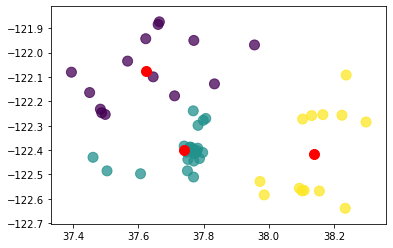

In [18]:
SFOb_cluster = SFOb_df[['location.lat','location.lng']]

kmeans_SFOb = KMeans(n_clusters=3).fit(SFOb_cluster)
centroids_SFOb = kmeans_SFOb.cluster_centers_
print(centroids_SFOb)

plt.scatter(SFOb_cluster['location.lat'],SFOb_cluster['location.lng'], c= kmeans_SFOb.labels_.astype(float), s=100, alpha=0.75)
plt.scatter(centroids_SFOb[:, 0], centroids_SFOb[:, 1], c='red', s=100)
plt.show()


In [19]:
df_SFOb_centroids = pd.DataFrame(centroids_SFOb)
df_SFOb_centroids.columns = ['latitude','longitude']
df_SFOb_centroids


,latitude,longitude
0,37.624762,-122.074220
1,37.739515,-122.400335
2,38.139788,-122.417722


*Determine number of breweries in each cluster and location (latitude and longitude) of corresponding centroids and put them in a dataframe*

In [21]:
kclusters_SFOb = kmeans_SFOb.labels_
clustercounts_SFOb = np.asarray(np.unique(kclusters_SFOb, return_counts=True))
print (clustercounts_SFOb)
df_SFOb_cluster = pd.DataFrame(clustercounts_SFOb).transpose()
df_SFOb_cluster.columns = ['centroid#','no. of breweries']
df_SFOb_cluster

[[ 0  1  2]
 [14 23 13]]


,centroid#,no. of breweries
0,0,14
1,1,23
2,2,13


In [22]:
df_SFOb_cluster1 = pd.merge(df_SFOb_cluster, df_SFOb_centroids, left_index=True, right_index=True)
df_SFOb_cluster1

,centroid#,no. of breweries,latitude,longitude
0,0,14,37.624762,-122.074220
1,1,23,37.739515,-122.400335
2,2,13,38.139788,-122.417722


#### 5.2. Repeating the similar process for BOS location

[[ 42.33233389 -71.08718037]
 [ 42.51909431 -70.92816864]
 [ 42.38270963 -71.26865674]]


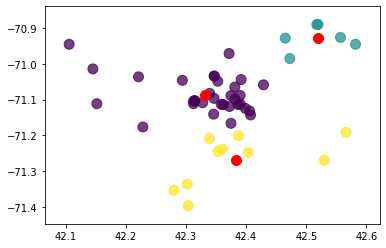

In [23]:
BOSb_cluster = BOSb_df[['location.lat','location.lng']]

kmeans_BOSb = KMeans(n_clusters=3).fit(BOSb_cluster)
centroids_BOSb = kmeans_BOSb.cluster_centers_
print(centroids_BOSb)

plt.scatter(BOSb_cluster['location.lat'],BOSb_cluster['location.lng'], c= kmeans_BOSb.labels_.astype(float), s=100, alpha=0.75)
plt.scatter(centroids_BOSb[:, 0], centroids_BOSb[:, 1], c='red', s=100)
plt.show()

In [24]:
df_BOSb_centroids = pd.DataFrame(centroids_BOSb)
df_BOSb_centroids.columns = ['latitude','longitude']
df_BOSb_centroids

,latitude,longitude
0,42.332334,-71.087180
1,42.519094,-70.928169
2,42.382710,-71.268657


In [25]:
kclusters_BOSb = kmeans_BOSb.labels_
clustercounts_BOSb = np.asarray(np.unique(kclusters_BOSb, return_counts=True))
print (clustercounts_BOSb)
df_BOSb_cluster = pd.DataFrame(clustercounts_BOSb).transpose()
df_BOSb_cluster.columns = ['cluster#','no. of breweries']
df_BOSb_cluster.set_index('cluster#', inplace=True)
df_BOSb_cluster

[[ 0  1  2]
 [34  6 10]]


,no. of breweries
cluster#,
0,34
1,6
2,10


In [26]:
df_BOSb_cluster1 = pd.merge(df_BOSb_cluster, df_BOSb_centroids, left_index=True, right_index=True)
df_BOSb_cluster1

,no. of breweries,latitude,longitude
cluster#,,,
0,34,42.332334,-71.087180
1,6,42.519094,-70.928169
2,10,42.382710,-71.268657


#### 6. Now among these clusters, we look at the museum options (the second parameter of interest) for each of the cluster centroids in both locations. The search radius is set to 20 km around the centroid.

In [27]:
limit1 = 10
radius1 = 20000
search_query1 = 'museum'

##### 6.1. We create a function to return the top 5 from the list of museums in the cluster neigborhoods and use for loop to add the list of museum on to the dataframes with clusters and breweries information

In [29]:
def df_explore(x,y):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, x, y, VERSION, search_query1, radius1, limit1)
    results = requests.get(url).json()
    r1 = results ['response']['venues']
    r2 = pd.json_normalize(r1)
    r3 = r2[['name']].head(5).transpose()
    return r3

df_SFOm = pd.DataFrame()  

for i in centroids_SFOb:
    df1 = df_explore(i[0], i[1])
    df_SFOm=df_SFOm.append(df1,ignore_index=False)
    
df_SFOm.reset_index(drop=True, inplace=True)
df_SFOm.columns = ['Museum1','Museum2','Museum3','Museum4','Museum5']
df_SFOm
    
df_SFO_beerandmuseum_tour = pd.merge(df_SFOb_cluster1, df_SFOm,left_index=True, right_index=True)
df_SFO_beerandmuseum_tour
   

,centroid#,no. of breweries,latitude,longitude,Museum1,Museum2,Museum3,Museum4,Museum5
0,0,14,37.624762,-122.074220,Niles Depot Museum,Museum on Main Street,Union City Historical Museum,Oakland Aviation Museum,Oakland Museum of California
1,1,23,37.739515,-122.400335,Museum of Craft and Design,de Young Museum,Children's Creativity Museum,Maritime Museum,Contemporary Jewish Museum
2,2,13,38.139788,-122.417722,Mare Island Historic Park Foundation Artifacts...,Petaluma Museum,Vallejo Naval and Historical Museum,Crockett Historical Society & Museum,Marin History Museum - Boyd Gate House


##### 6.2. Repeating the creation of summary dataframe for BOS location

In [31]:

df_BOSm = pd.DataFrame()  

for i in centroids_BOSb:
    df2 = df_explore(i[0], i[1])
    df_BOSm=df_BOSm.append(df2,ignore_index=False)
    
df_BOSm.reset_index(drop=True, inplace=True)
df_BOSm.columns = ['Museum1','Museum2','Museum3','Museum4','Museum5']
df_BOSm
    
df_BOS_beerandmuseum_tour = pd.merge(df_BOSb_cluster1, df_BOSm,left_index=True, right_index=True)
df_BOS_beerandmuseum_tour
   
        
    

,no. of breweries,latitude,longitude,Museum1,Museum2,Museum3,Museum4,Museum5
cluster#,,,,,,,,
0,34,42.332334,-71.087180,Museum of Fine Arts,Isabella Stewart Gardner Museum,MBTA Museum of Fine Arts Station,Museum of Science,Boston Tea Party Ships and Museum
1,6,42.519094,-70.928169,Museum Place Mall,Historic New England Phillips House Museum,Peabody Essex Museum (PEM),Salem Witch Museum,Witch History Museum
2,10,42.382710,-71.268657,Charles River Museum of Industry & Innovation,DeCordova Museum and Sculpture Park,Museum of Science,Museum of Modern Renaissance,National Heritage Museum
